In [121]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [122]:
folder_path = os.getcwd()
model_path = os.path.join(folder_path, "mnist-original.mat")

In [123]:
mnist_raw = loadmat(model_path)

In [124]:
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

In [125]:
X=mnist["data"]
y=mnist["target"]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

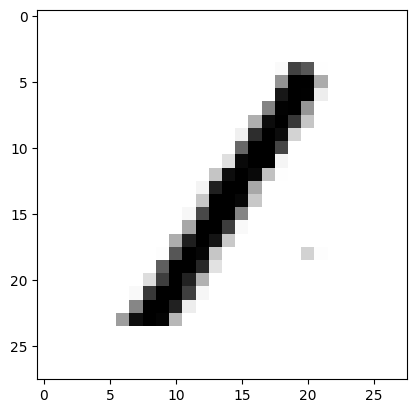

In [127]:
number = X[10000]
number_image = number.reshape(28,28)
plt.imshow(number_image,cmap=plt.cm.binary,interpolation="nearest")
plt.show()

In [128]:
X_train = X_train.astype('float32') / 255.0
x_train = X_train.reshape(-1, 28, 28)

X_test = X_test.astype('float32') / 255.0
x_test = X_test.reshape(-1, 28, 28)

In [129]:
import tensorflow as tf

In [130]:

def build_model(my_learning_rate):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(784,)),  # แปลง input 2D เป็น 1D
        tf.keras.layers.Dense(units=128, activation='relu'),  # เพิ่ม hidden layer
        tf.keras.layers.Dense(units=10, activation='softmax')  # output layer สำหรับ 10 classes
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model   

In [131]:
import pandas as pd
def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["accuracy"]
  print("Finished training the model.")
  print("Epochs trained: {}".format(epochs))
  print(history.history.keys())
  return trained_weight, trained_bias, epochs, rmse , history , model

print("Defined build_model and train_model")

Defined build_model and train_model


In [132]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    if len(feature) != len(label):
        min_size = min(len(feature), len(label))
        feature = feature[:min_size]
        label = label[:min_size]
        print(f"Resized feature and label to size: {min_size}")

    plt.xlabel("feature")
    plt.ylabel("label")
    plt.scatter(feature, label)

    # คำนวณเส้นตรงจาก weight และ bias
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')
    plt.show()

def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [133]:
print(f"Feature size: {len(X_train)}, Label size: {len(y_train)}")


Feature size: 56000, Label size: 56000


In [134]:
learning_rate = 1e-10
epochs = 50
my_batch_size = 2048

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse , history, model = train_model(my_model, X_train, y_train, epochs, my_batch_size)

Epoch 1/50


d:\Anaconda\envs\Deep-l\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5614 - loss: 1.5918
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8732 - loss: 0.4718
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9057 - loss: 0.3440
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9192 - loss: 0.2930
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9265 - loss: 0.2629
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9347 - loss: 0.2383
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9383 - loss: 0.2218
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9436 - loss: 0.2057
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9476 - loss: 0.1895
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9499 - loss: 0.1772
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9542 - loss: 0.1637
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9579 - loss: 0.1514


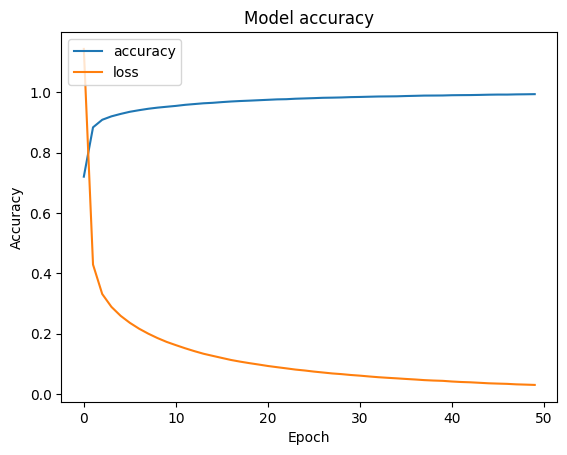

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


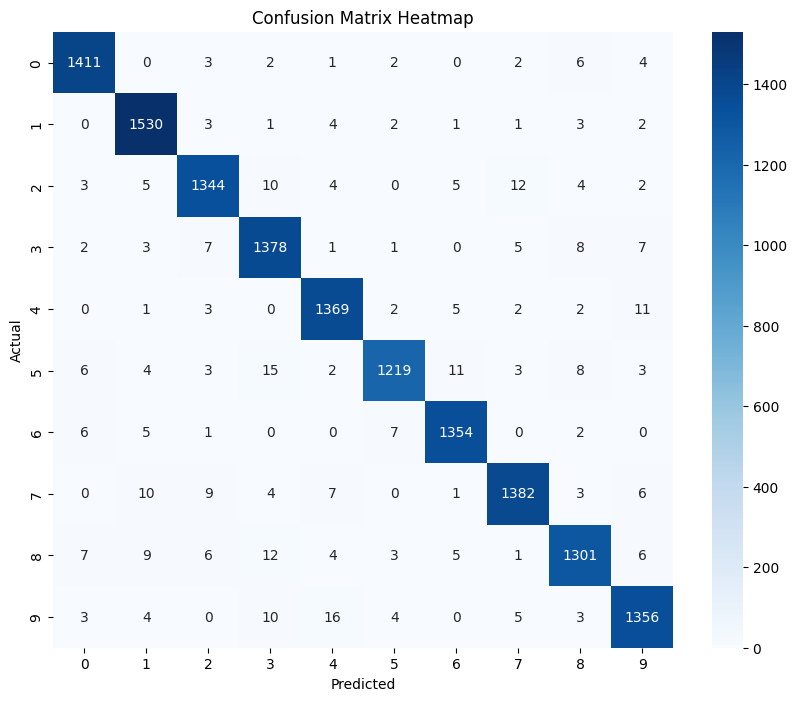

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9812    0.9860    0.9836      1431
         1.0     0.9739    0.9890    0.9814      1547
         2.0     0.9746    0.9676    0.9711      1389
         3.0     0.9623    0.9759    0.9691      1412
         4.0     0.9723    0.9814    0.9768      1395
         5.0     0.9831    0.9568    0.9698      1274
         6.0     0.9797    0.9847    0.9822      1375
         7.0     0.9781    0.9719    0.9750      1422
         8.0     0.9709    0.9609    0.9659      1354
         9.0     0.9707    0.9679    0.9693      1401

    accuracy                         0.9746     14000
   macro avg     0.9747    0.9742    0.9744     14000
weighted avg     0.9746    0.9746    0.9746     14000



In [136]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = my_model.predict(X_test).argmax(axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Calculate the classification report
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)